# Linear Regression

## The normal equation

\begin{gather*}
\hat{\theta}=(X^TX)^{-1} X^T y
\end{gather*}

In Introduction to Linear Algebra by Strang, the formula is:
\begin{gather*}
\hat{x}=(A^TA)^{-1} A^T b
\end{gather*}

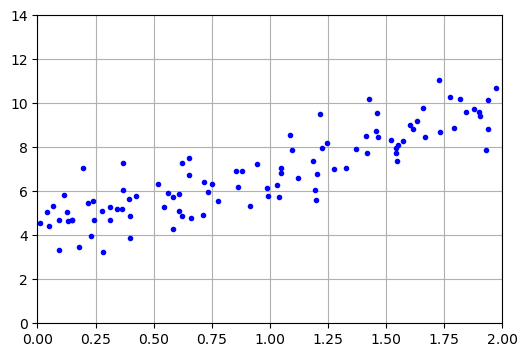

In [26]:
# Generate some linear-looking data for testing
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 100 # number of instances
X = 2 * np.random.rand(m, 1) # column vector
y = 4 + 3 * X + np.random.randn(m, 1) # column vector

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 14]) # Range of the axis' values
plt.grid()
plt.show()

In [27]:
# Compute the normal equation
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

Function used to compute y:

\begin{gather*}
y = 4 + 3x_1 + noise
\end{gather*}

where noise is the np.random.randn(m, 1).
So, the expected parameters would be 4 and 3, but as we added a noise value, the computed parameters are no quite these values, but close enough.
The predicted equation would be:

\begin{gather*}
\hat{y} = 4.21509616x_0 + 2.77011339x_1
\end{gather*}

In [28]:
# Predict values
X_new = np.array([[0], [2]]) # The min and max values of the plot, so we can get a straight line
X_new_b = add_dummy_feature(X_new) # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best # Dot product = plug the values of X_new_b into the 'y' function with the theta_best parameters (see previous equation)
y_predict

array([[4.21509616],
       [9.75532293]])

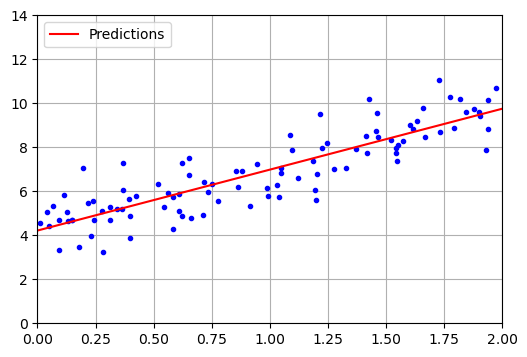

In [29]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.axis([0, 2, 0, 14]) # Range of the axis' values
plt.grid()
plt.legend(loc="upper left")
plt.show()

### The same projection but using LinearRegression class from sklearn

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [31]:
lin_reg.predict(X_new)
# The same values, and it's not required to append the dummy "1" column.

array([[4.21509616],
       [9.75532293]])

# Batch gradient descent

In [32]:
eta = 0.1 # learning rate
n_epochs = 1000
m = len(X_b) # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1) # Randomly initialized model parameters (the starting point from which the algorithm would iterate)

for epoch in range(n_epochs):
    gradients = (2 / m) * (X_b.T @ (X_b @ theta - y))
    theta = theta - eta * gradients

theta

array([[4.21509616],
       [2.77011339]])

# Stochastic gradient descent

In [33]:
n_epochs = 50
t0, t1 = 5, 50 # Learning schedule hyperparameters

# Determines the learning rate (eta) at each iteration
def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1) # Random initialization

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi =   y[random_index : random_index + 1]
        gradients = 2 * (xi.T @ (xi @ theta - yi)) # Same as batch, but instead of using the entire sets (X, y), just use 
                                                   # the values picked randomly (xi, yi). As for this, the divide by 2 is not required.
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

theta

array([[4.21076011],
       [2.74856079]])

In [34]:
# Perform linear regression using SGD with sklearn
from sklearn.linear_model import SGDRegressor

# max_iter = n_epochs
# if it runs n_iter_no_change times, and the score loss drops by less than "tol", it stops (even before max_iter).
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel()) # ravel() makes the 2D array into 1D array (which fit() expected)

,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,1e-05
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [35]:
sgd_reg.predict(X_new)

array([4.21278812, 9.75819346])

In [36]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

# Polynomial Regression

In [37]:
# Generate random data
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = (0.5 * (X ** 2)) + X + 2 + np.random.randn(m, 1)

Equation used for y:
\begin{gather*}
y = 0.5x^2 + x + 2 + noise
\end{gather*}

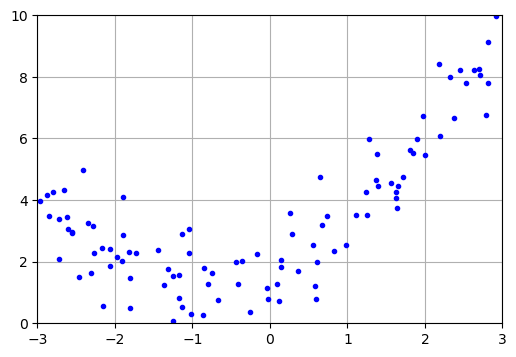

In [38]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.axis([-3, 3, 0, 10]) # Range of the axis' values
plt.grid()
plt.show()

In [39]:
from sklearn.preprocessing import PolynomialFeatures

# With degree=2, the new dataset will have 2 columns -> [0] = the original value; [1] = the original value squared.
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [40]:
X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [41]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
# Here:
#   intercept: the "c" term
#   coef: X and X^2 (in that order, reversed)

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

The predicted equation would be:
\begin{gather*}
\hat{y} = 0.56x^2 + 0.93x + 1.78
\end{gather*}

In [42]:
# Predict values
X_new = np.linspace(-3, 3, 100).reshape(100, 1) # Generate 100 values between -3 and 3, continuosly
X_new_poly = poly_features.transform(X_new)
y_predict_poly = lin_reg.predict(X_new_poly)

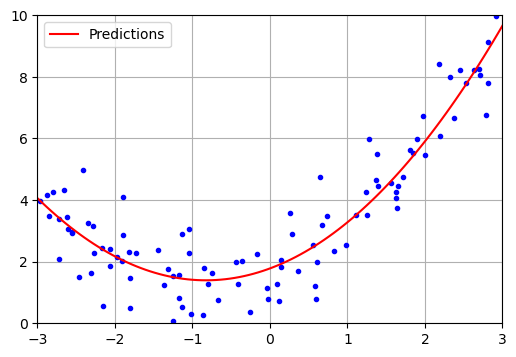

In [43]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict_poly, "r-", label="Predictions")
plt.axis([-3, 3, 0, 10]) # Range of the axis' values
plt.grid()
plt.legend(loc="upper left")
plt.show()

# Learning curves

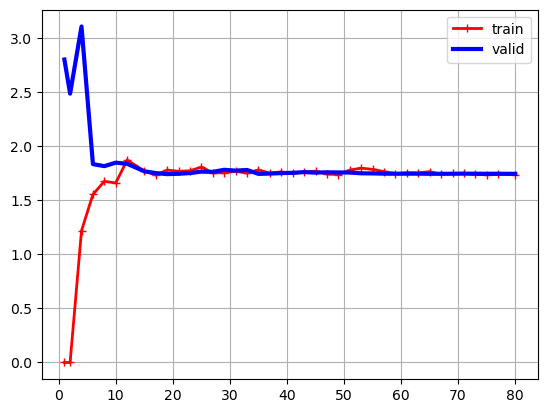

In [44]:
# Learning curve of LinearRegression (straight line)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), 
                                                         cv=5, scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
# plt.axis([0, 80, 0, 3.5]) # Range of the axis' values
plt.grid()
plt.legend(loc="upper right")
plt.show()

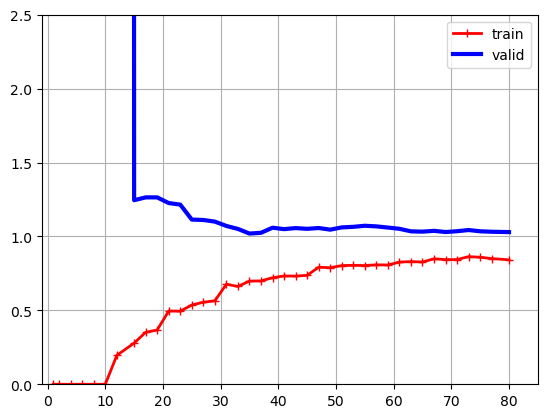

In [45]:
# Learning curve of 10th-degree polynomial
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression(),
)

train_sizes, train_scores, valid_scores = learning_curve(polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40),
                                                        cv=5, scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.axis([-1, 85, 0, 2.5]) # Range of the axis' values
plt.grid()
plt.legend(loc="upper right")
plt.show()

# Regularized learning models

## Ridge regression

In [47]:
# Close-form
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([4.82899748])

In [49]:
# Using stochastic gradient descent
sgd_reg = SGDRegressor(penalty='l2', alpha=0.1 / m, tol=None, max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D targets
sgd_reg.predict([[1.5]])

array([4.82830117])

## Lasso regression

In [51]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.77621741])

## Elastic net regression

In [53]:
from sklearn.linear_model import ElasticNet

# l1_ratio is the mix ratio r
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.78114505])

# Early stopping

In [57]:
# On regularization of iterative learning algorithms (such as GD) 
# it's a good idea to stop training when the validation error reaches a minimum.
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Re-generate quadratic random data
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = (0.5 * (X ** 2)) + X + 2 + np.random.randn(m, 1)

X_train, y_train, X_valid, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessing = make_pipeline(
    PolynomialFeatures(degree=90, include_bias=False), 
    StandardScaler(),
)
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float("inf")

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)


/home/juliovr/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [80, 20]

array([[ 1.55811593,  1.22354376,  1.65867507, ..., -0.14399946,
         0.08192434, -0.14278068],
       [ 1.43909981,  0.85115307,  1.30505108, ..., -0.14400692,
         0.08191801, -0.14278612],
       [-0.92168212,  0.05791038, -0.46315689, ..., -0.14400692,
         0.08191801, -0.14278612],
       ...,
       [-0.98296906,  0.20450104, -0.56953432, ..., -0.14400692,
         0.08191801, -0.14278612],
       [ 1.00498882, -0.23670461,  0.46770759, ..., -0.14400692,
         0.08191801, -0.14278612],
       [ 1.05425435, -0.13460146,  0.53190584, ..., -0.14400692,
         0.08191801, -0.14278612]])